ISS Position


/var/folders/2w/1v64qkf12w716lkbh7grkq4r0000gn/T/ipykernel_54478/3031698003.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  human_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')


1/100 - Time: 2025-07-03 16:11:24, Latitude: -23.5452, Longitude: -99.2423
2/100 - Time: 2025-07-03 16:11:34, Latitude: -24.0439, Longitude: -98.7832
3/100 - Time: 2025-07-03 16:11:46, Latitude: -24.5883, Longitude: -98.2759
4/100 - Time: 2025-07-03 16:11:58, Latitude: -25.1777, Longitude: -97.7189
5/100 - Time: 2025-07-03 16:12:11, Latitude: -25.7879, Longitude: -97.1335


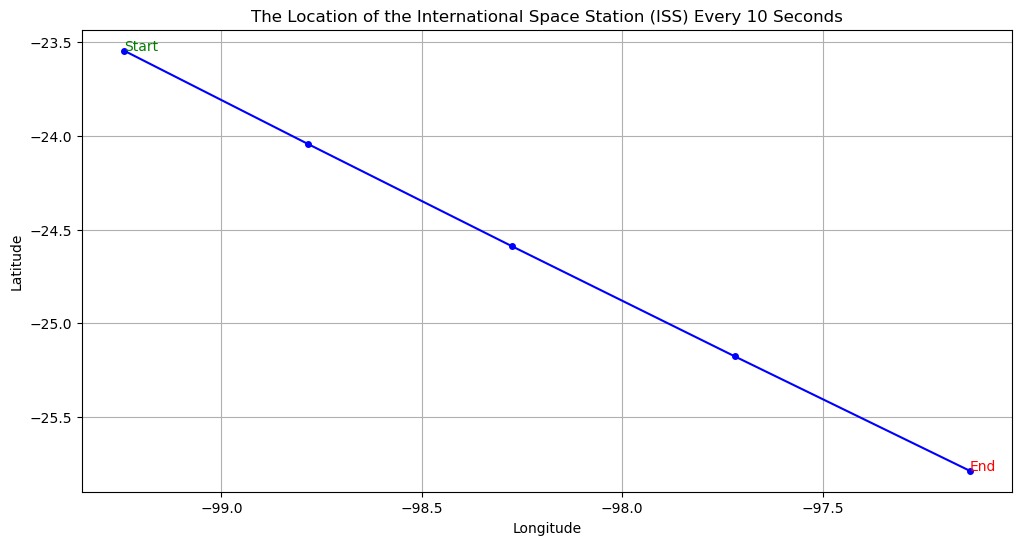

In [22]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

# ISS data
latitudes = []
longitudes = []
timestamps = []

print("ISS Position")
for i in range(100):
    response = requests.get("http://api.open-notify.org/iss-now.json") 
    loc = response.json()

    lati = float(loc['iss_position']['latitude'])
    long = float(loc['iss_position']['longitude'])
    timestamp = loc['timestamp']

    # Convert timestamp to readable format
    human_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    
    # Store data
    latitudes.append(lati)
    longitudes.append(long)
    timestamps.append(human_time)

    print(f"{i+1}/100 - Time: {human_time}, Latitude: {lati}, Longitude: {long}")
    time.sleep(10)  # Wait 10 seconds

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue', markersize=4)

# Start and end
plt.annotate("Start", (longitudes[0], latitudes[0]), color='green')
plt.annotate("End", (longitudes[-1], latitudes[-1]), color='red')

plt.title("The Location of the International Space Station (ISS) Every 10 Seconds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
